In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk

In [ ]:
# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Load the dataset
df = pd.read_csv('blogs.csv')

# Step 2: Exploratory Data Analysis (EDA)

In [ ]:
# Check the size of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

Dataset contains 2000 rows and 2 columns


In [ ]:
# View the first few rows of the dataset
print(df.head())

                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


In [ ]:
# Check for missing values
print(df.isnull().sum())

Data      0
Labels    0
dtype: int64


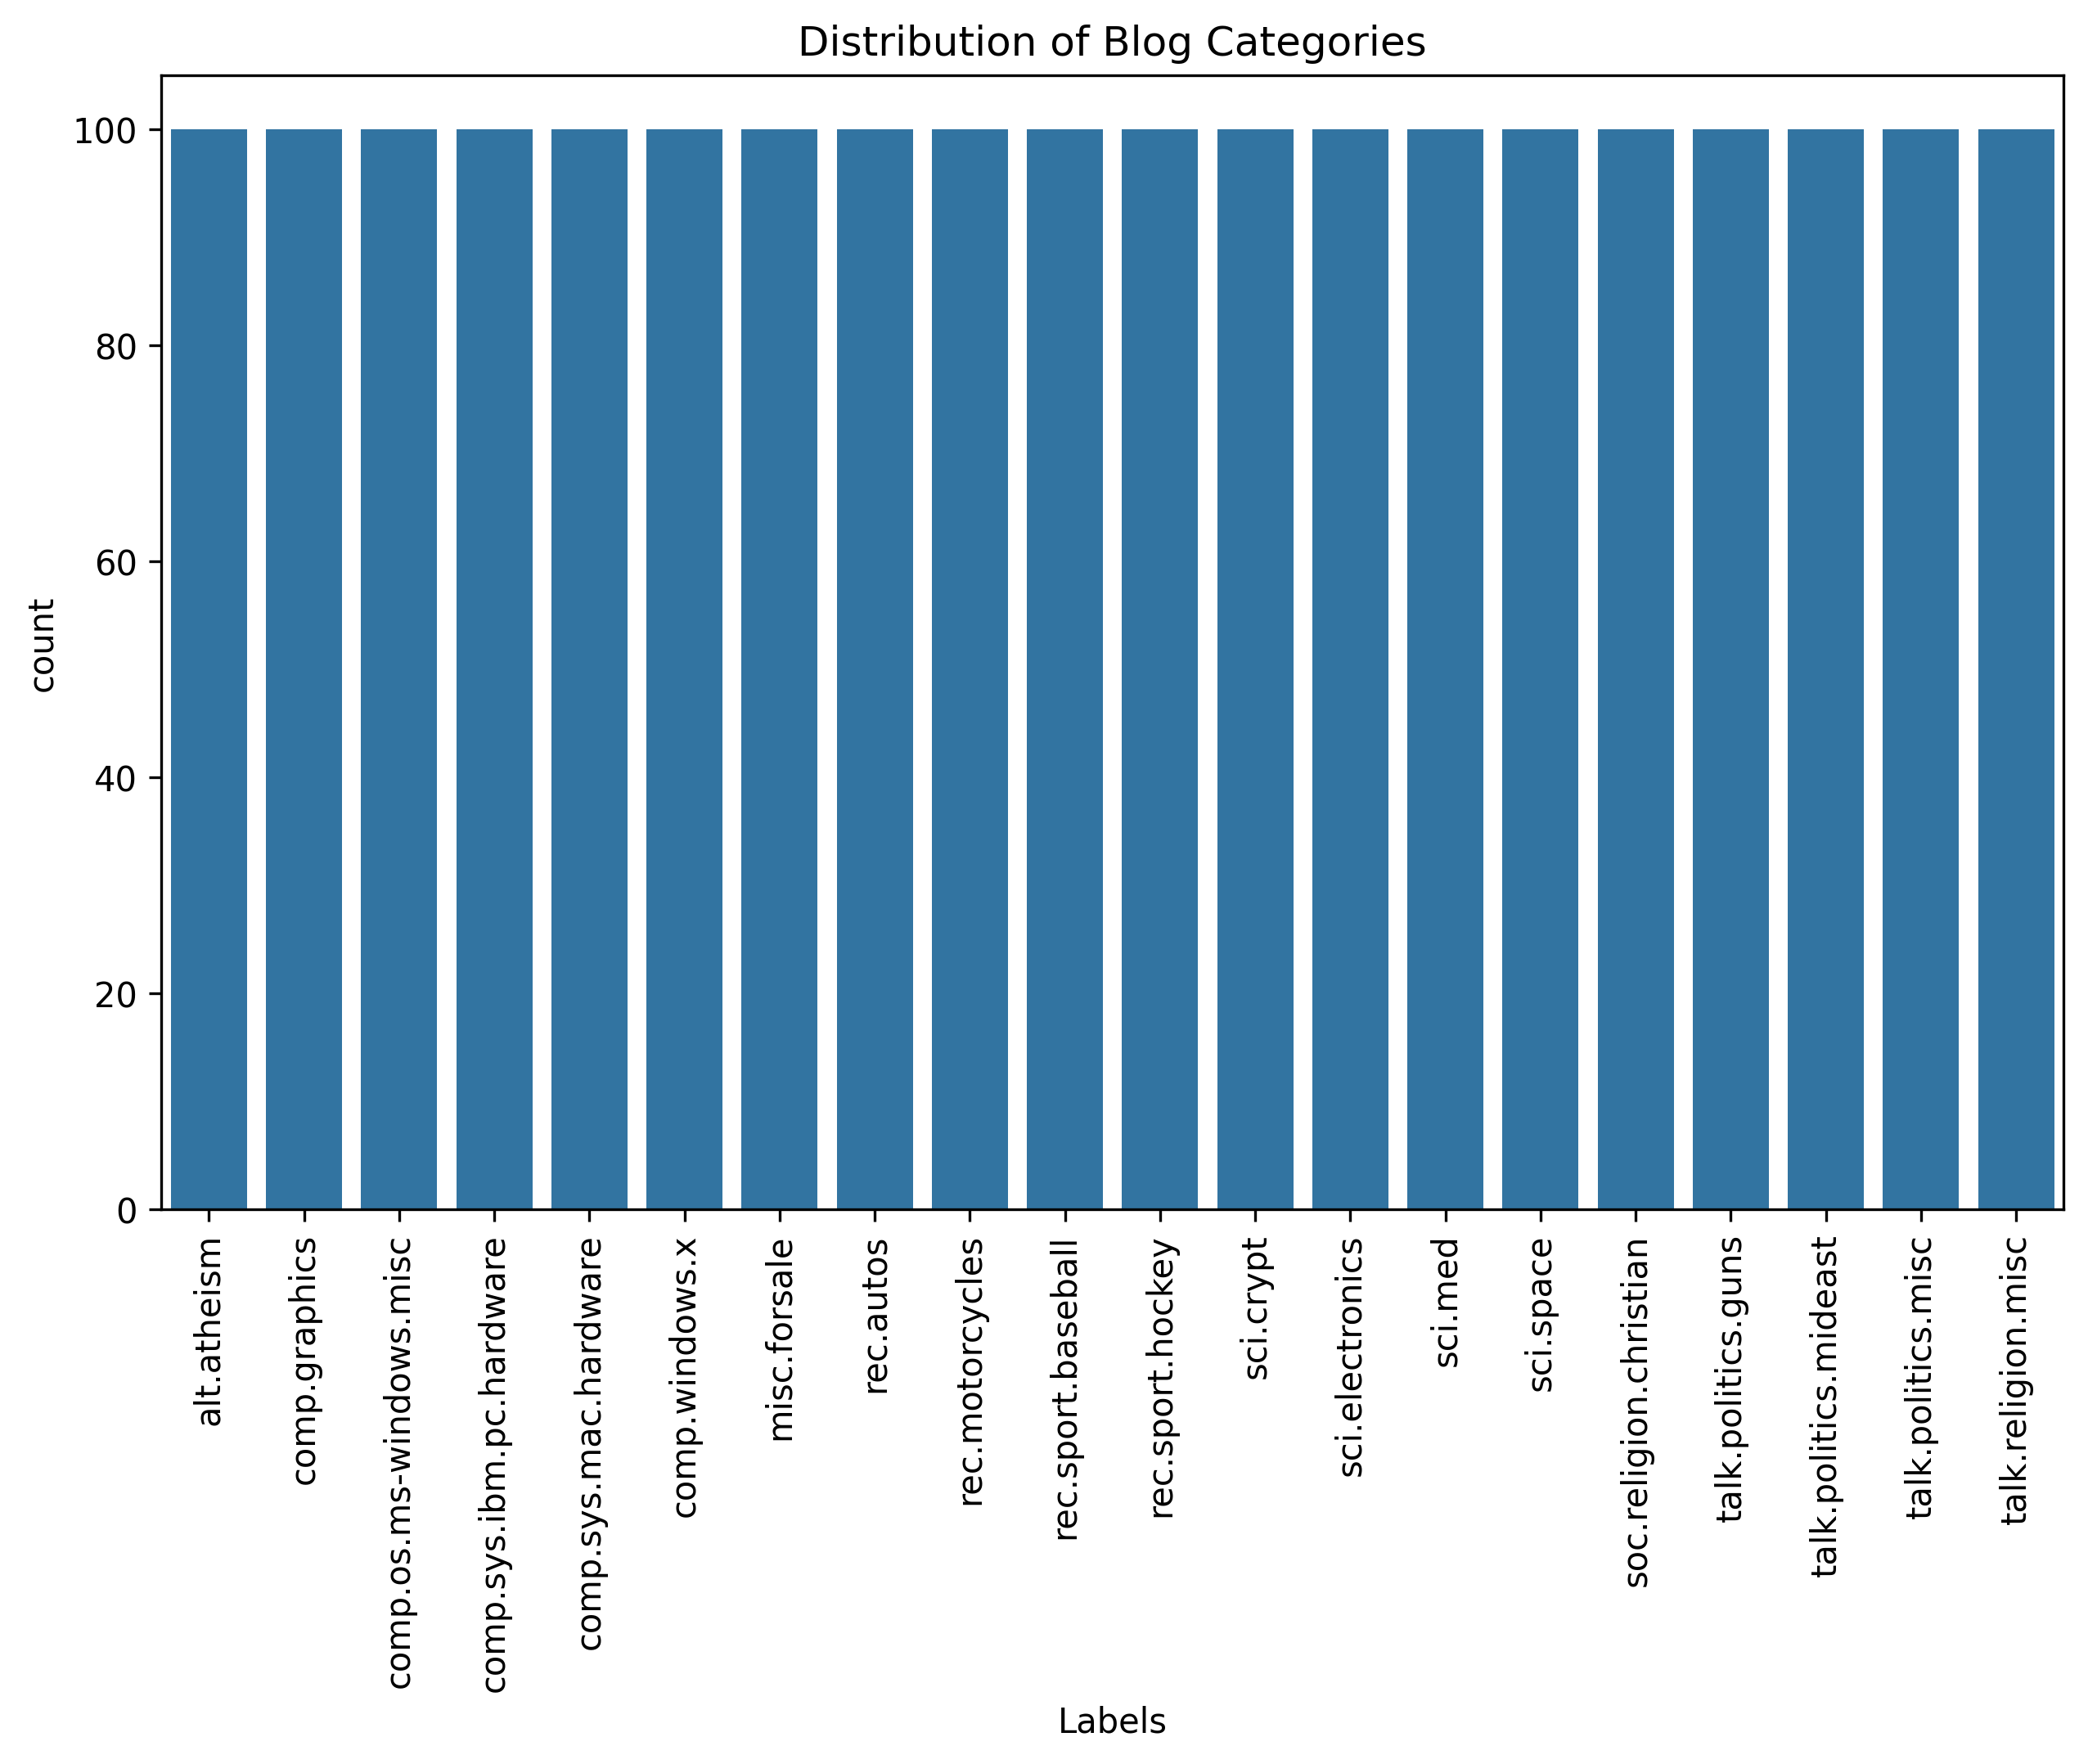

In [ ]:
# Analyze the distribution of blog categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Labels')
plt.title('Distribution of Blog Categories')
plt.xticks(rotation=90)
plt.show()

# Step 3: Data Preprocessing

In [ ]:
# Function to clean text
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Join tokens back to string
    text = ' '.join(tokens)
    return text

In [ ]:
# Apply text preprocessing
df['Cleaned_Data'] = df['Data'].apply(preprocess_text)

In [ ]:
# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Cleaned_Data']).toarray()

In [ ]:
# Convert labels to numeric values
y = df['Labels']

In [ ]:
# Check the resulting feature matrix and labels
print(f"Feature matrix shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Feature matrix shape: (2000, 5000)
Labels shape: (2000,)


Step 4: Naive Bayes Model for Text Classification

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

In [ ]:
# Train the model on the training data
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

In [ ]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8225


In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.87        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med       0.88      0.88      0

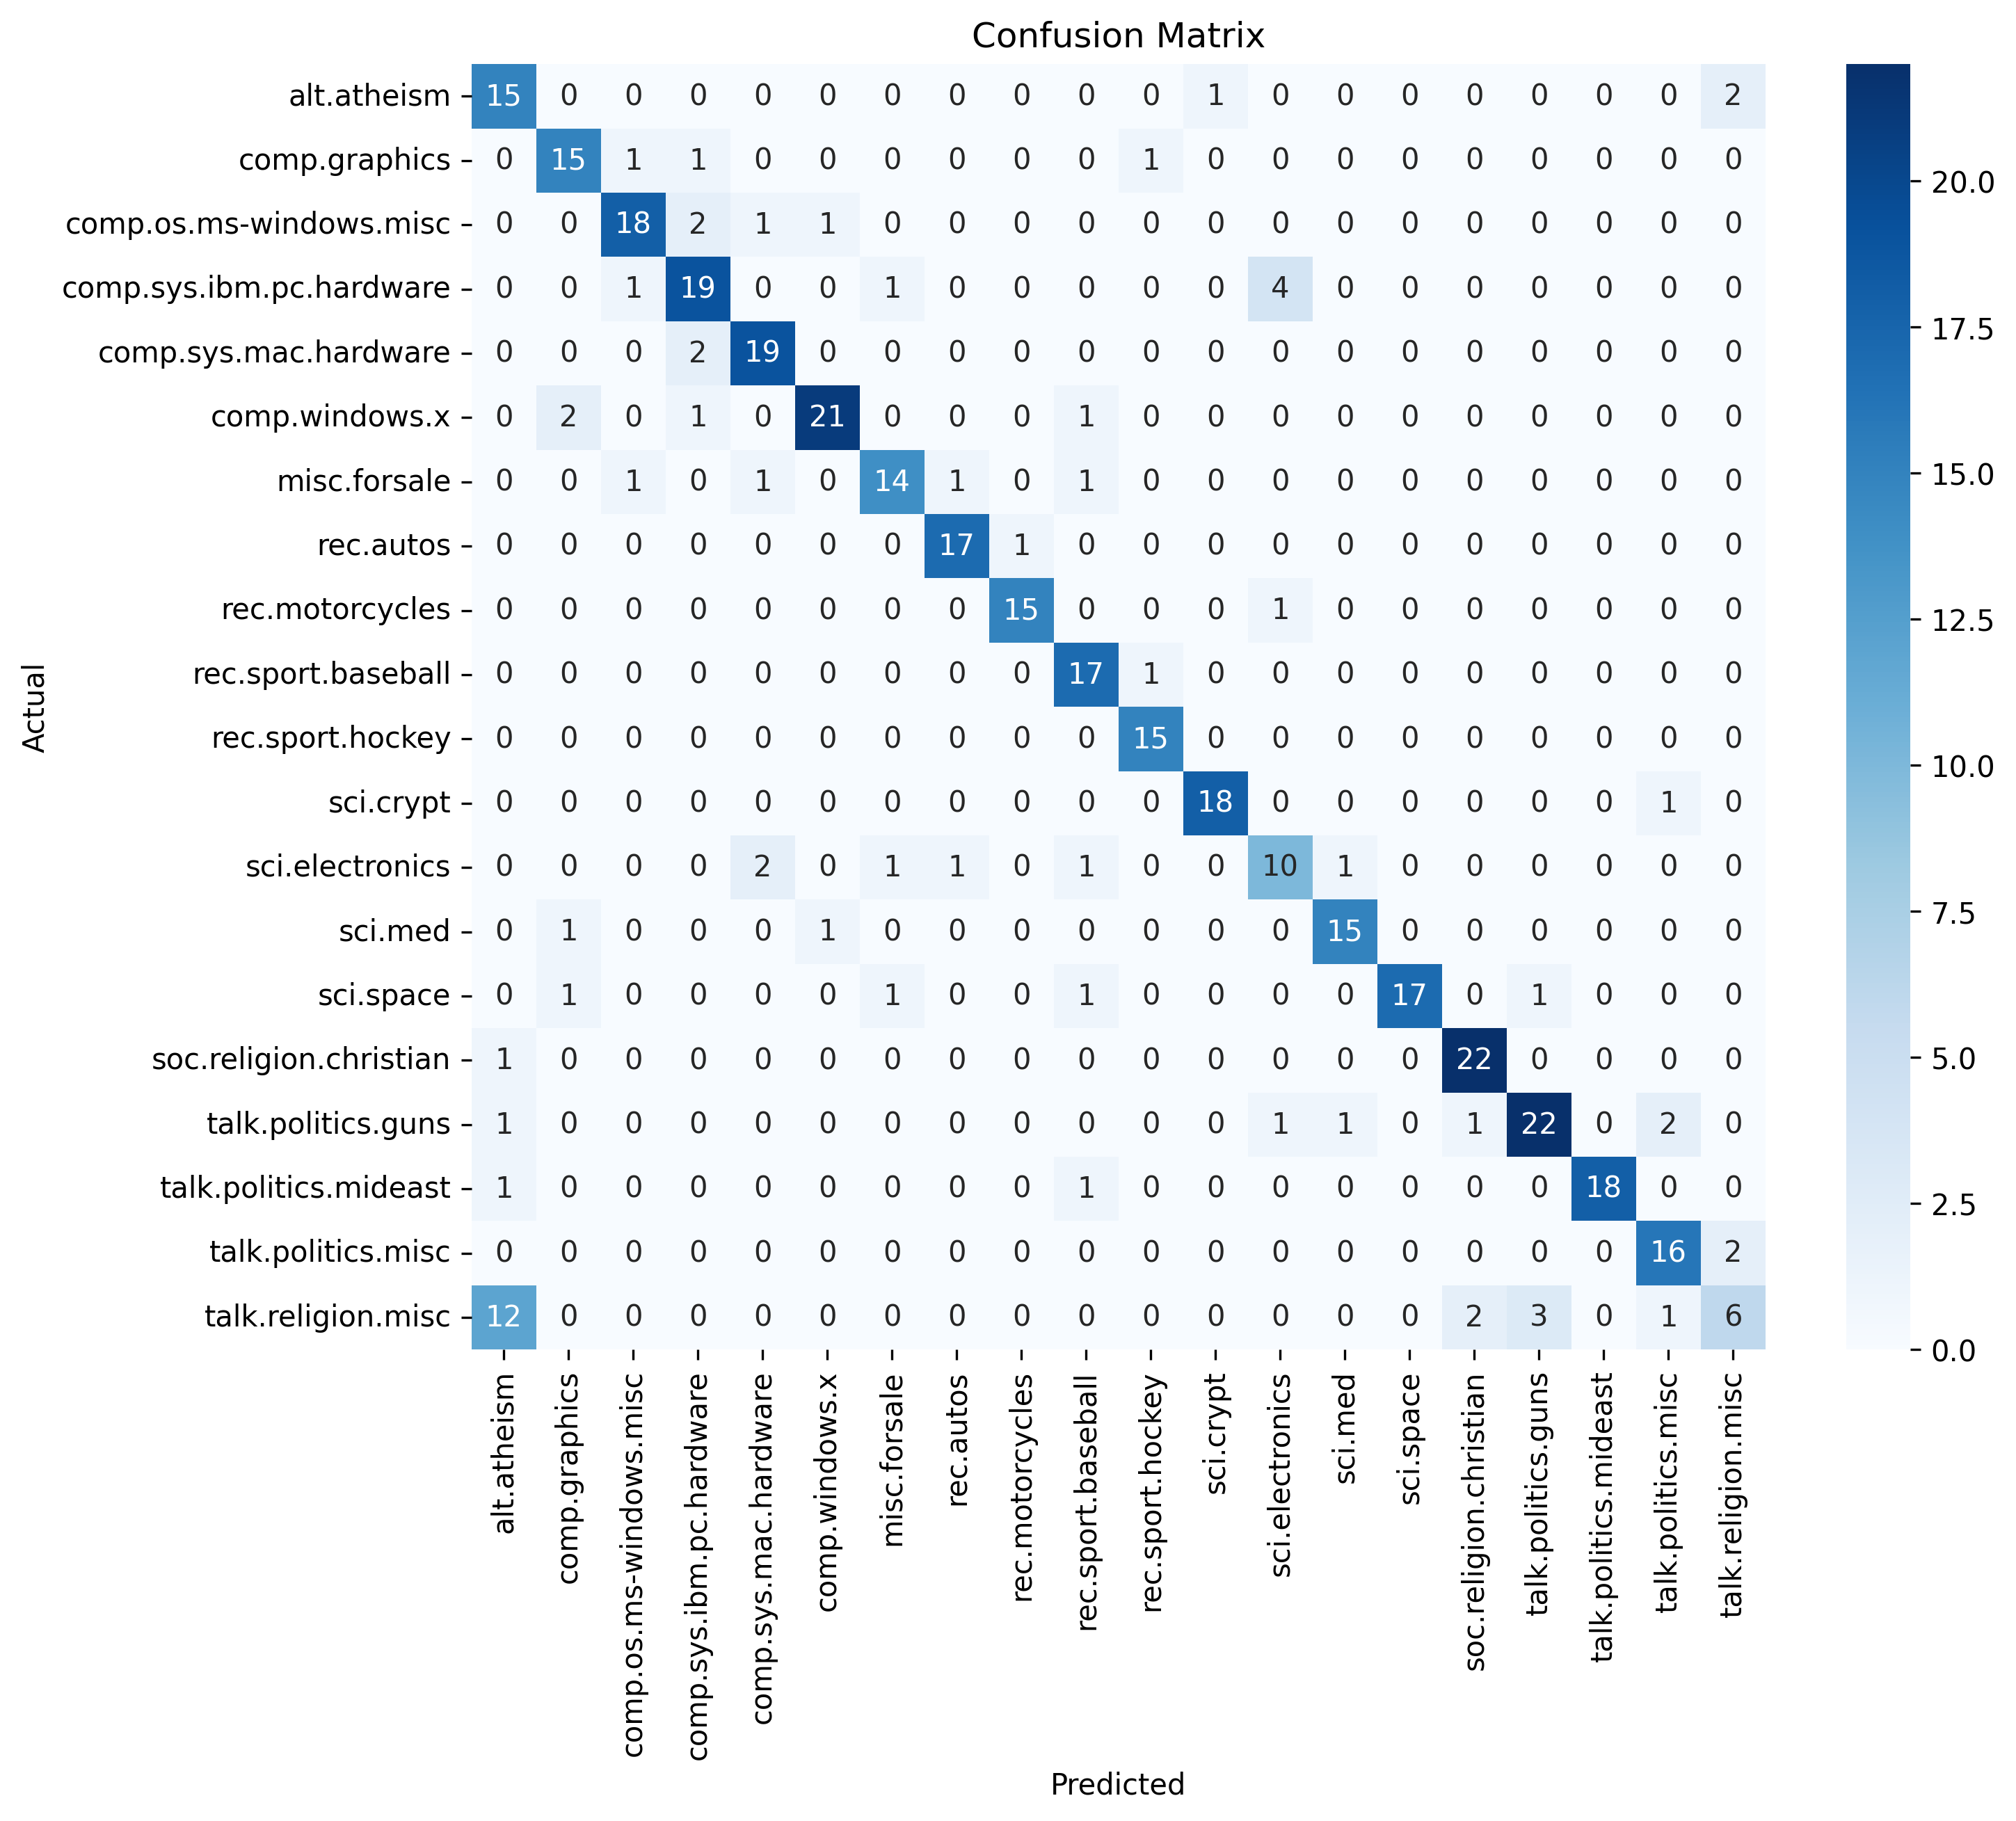

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

step

In [ ]:
# Import necessary libraries for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Initialize the VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
# Function to get sentiment from text
def get_sentiment(text):
    sentiment_scores = sid.polarity_scores(text)
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
# Apply sentiment analysis to the data
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [ ]:
# Apply sentiment analysis to the data
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [ ]:
# Examine the distribution of sentiments
sentiment_counts = df['Sentiment'].value_counts()
print("Sentiment Distribution:")
print(sentiment_counts)

Sentiment Distribution:
Sentiment
Positive    1334
Negative     631
Neutral       35
Name: count, dtype: int64


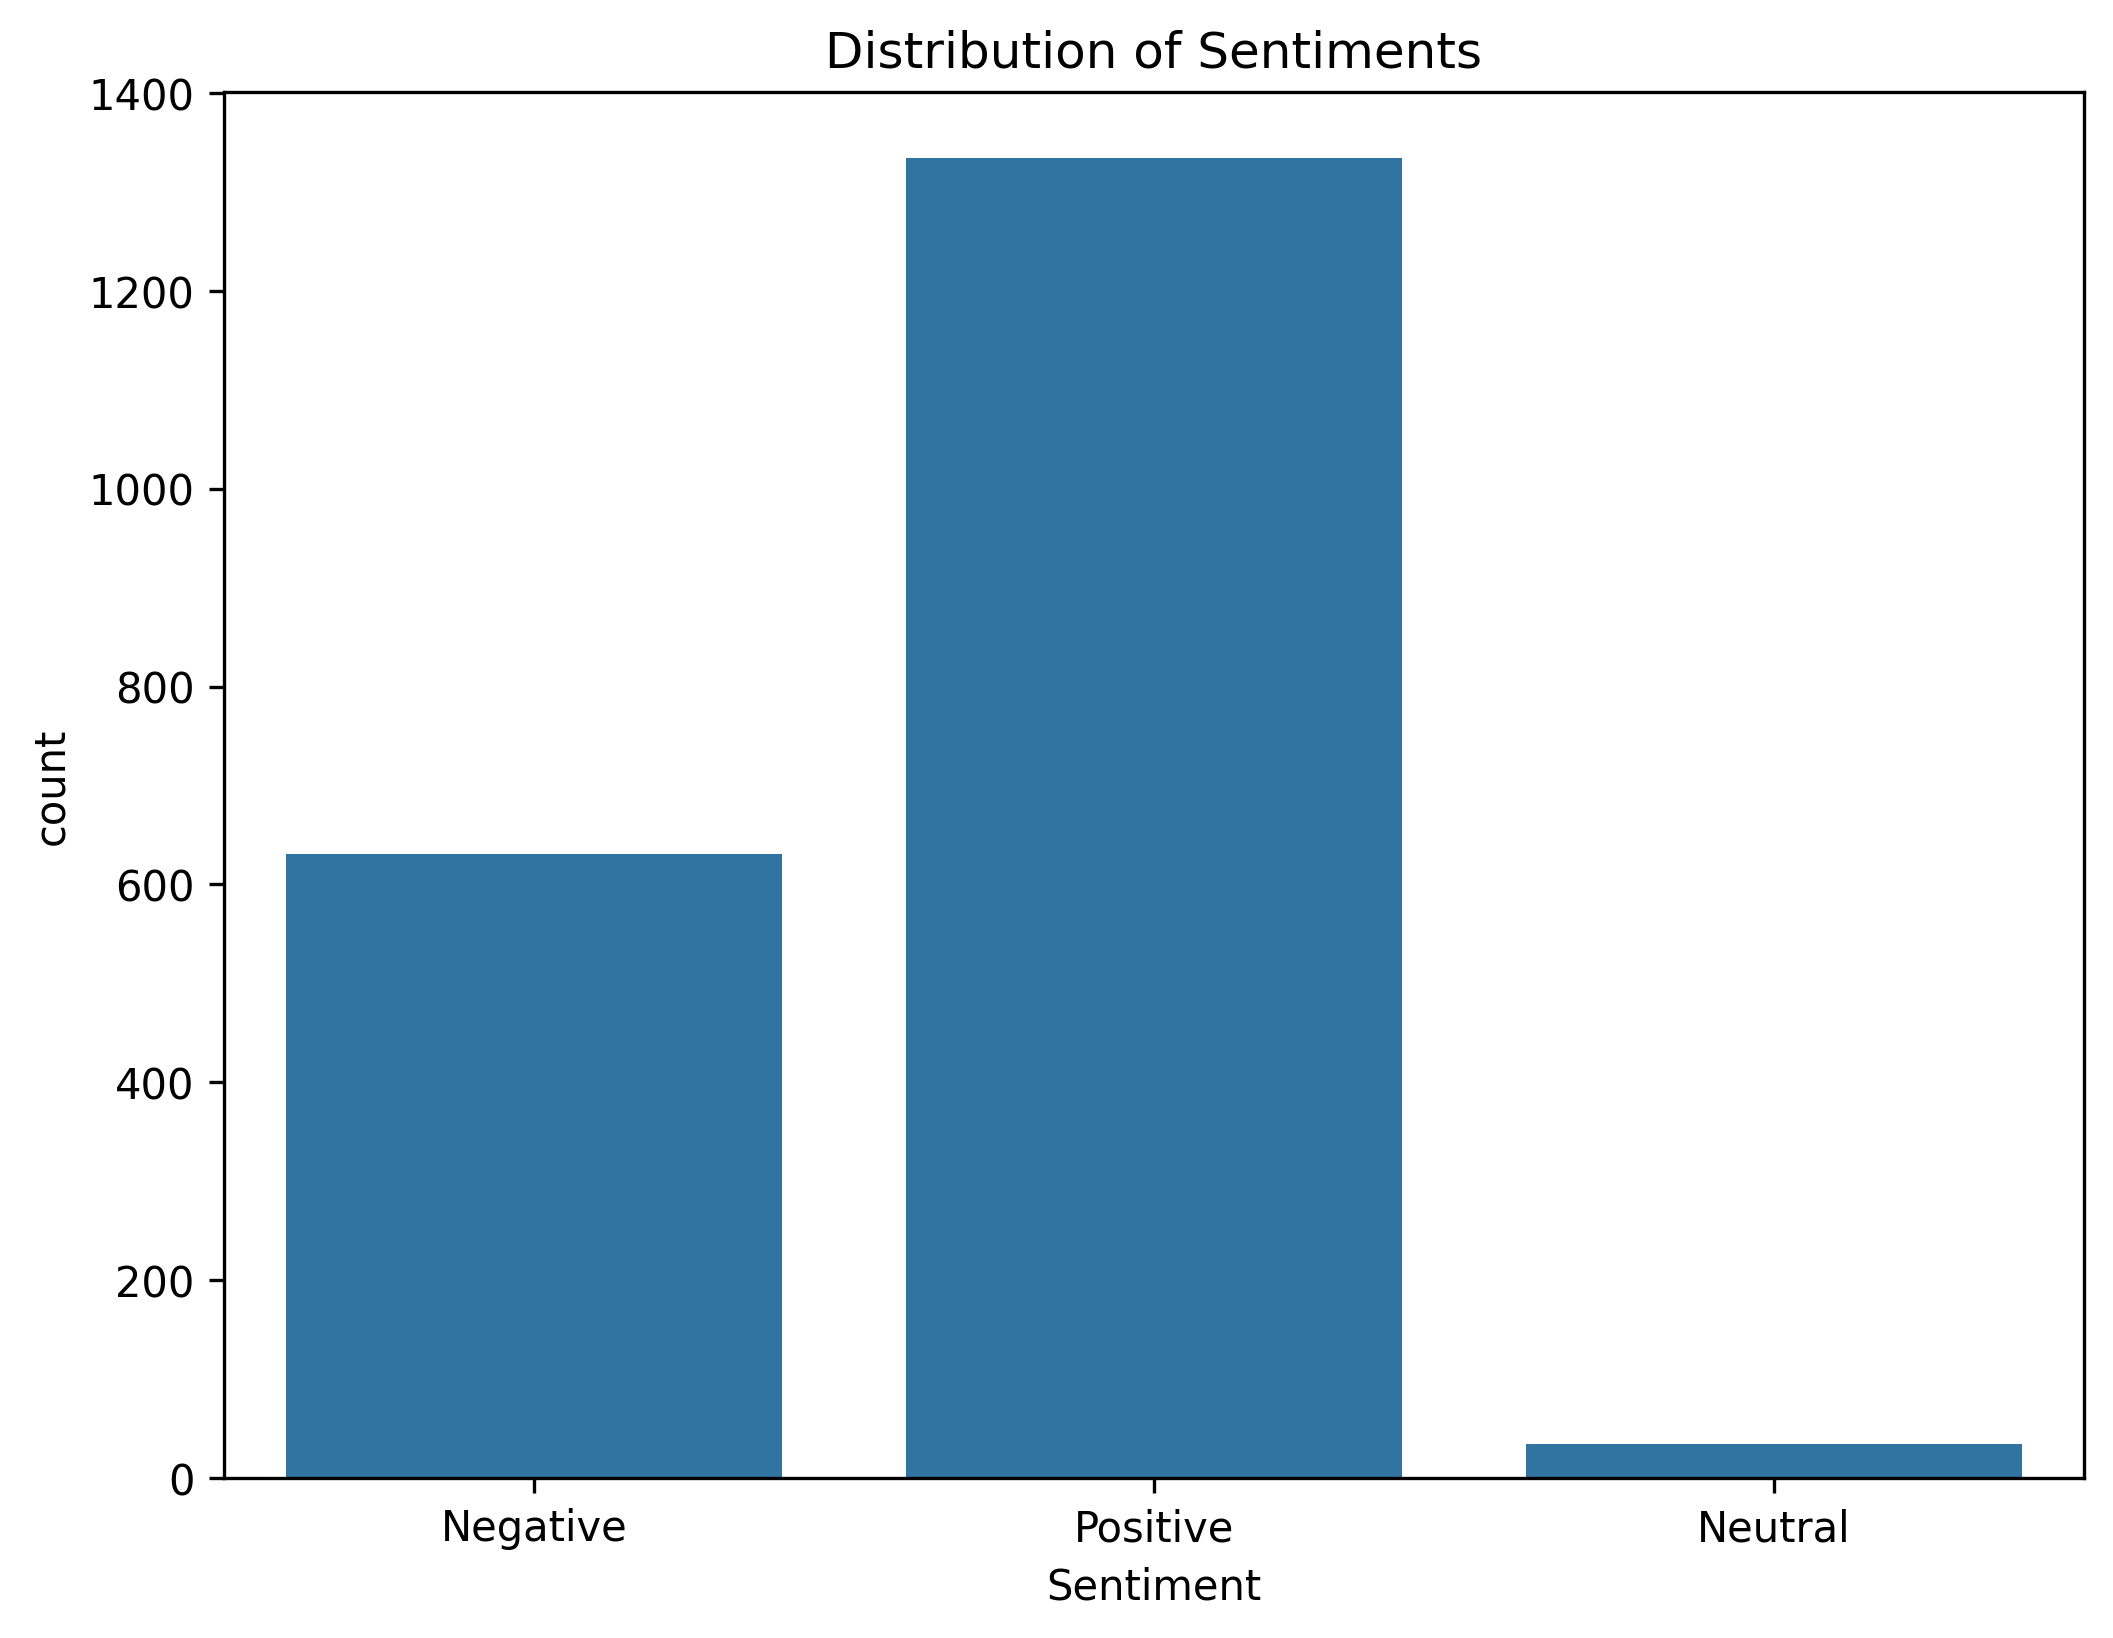

In [ ]:
# Plot the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment')
plt.title('Distribution of Sentiments')
plt.show()

In [ ]:
# Examine the distribution of sentiments across categories
category_sentiment_counts = df.groupby('Labels')['Sentiment'].value_counts().unstack().fillna(0)
print("Sentiment Distribution Across Categories:")
print(category_sentiment_counts)

Sentiment Distribution Across Categories:
Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                   42.0      1.0      57.0
comp.graphics                 13.0      4.0      83.0
comp.os.ms-windows.misc       24.0      2.0      74.0
comp.sys.ibm.pc.hardware      21.0      0.0      79.0
comp.sys.mac.hardware         24.0      3.0      73.0
comp.windows.x                20.0      2.0      78.0
misc.forsale                   7.0      8.0      85.0
rec.autos                     27.0      1.0      72.0
rec.motorcycles               30.0      2.0      68.0
rec.sport.baseball            27.0      1.0      72.0
rec.sport.hockey              28.0      1.0      71.0
sci.crypt                     29.0      0.0      71.0
sci.electronics               18.0      4.0      78.0
sci.med                       38.0      1.0      61.0
sci.space                     32.0      3.0      65.0
soc.religion.christian        29.0      

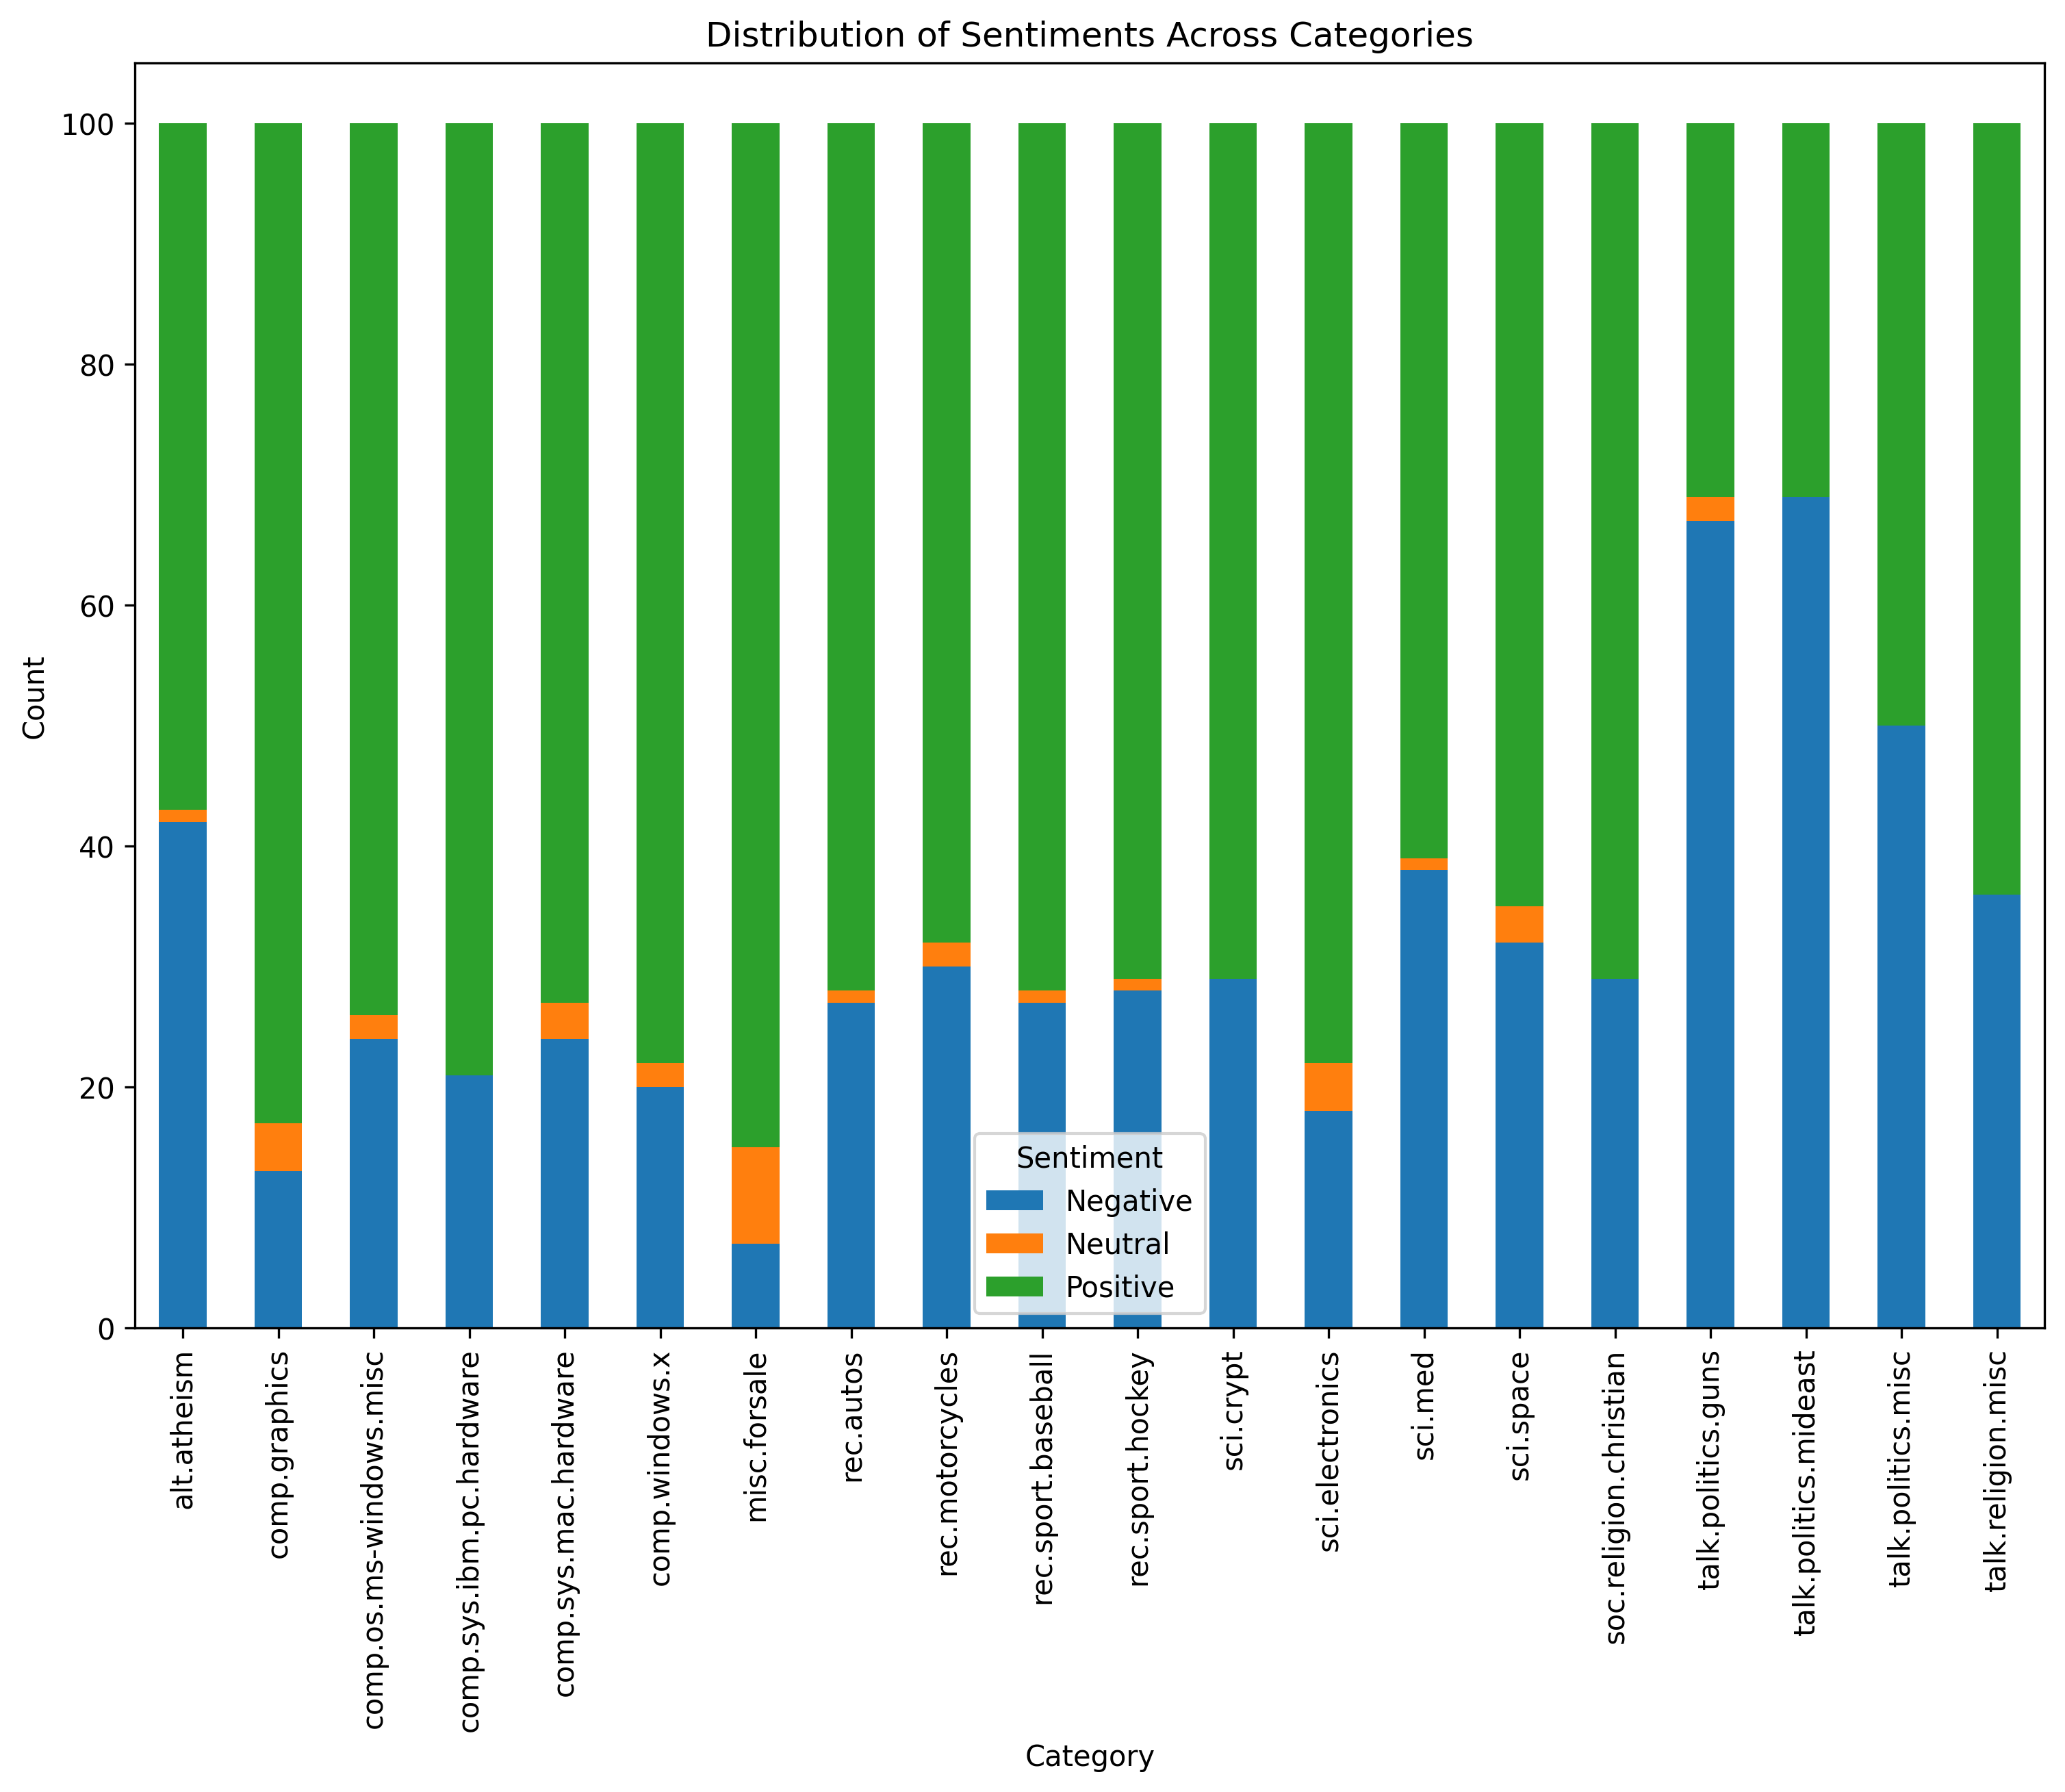

In [ ]:
# Plot the distribution of sentiments across categories
category_sentiment_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Sentiments Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')